In [74]:
import math
import random
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import scipy

## Normal Random Variable

In [57]:
'''정규분포 cdf의 역함수'''
def inv_normal_df(u):
    return stats.norm.ppf(u)

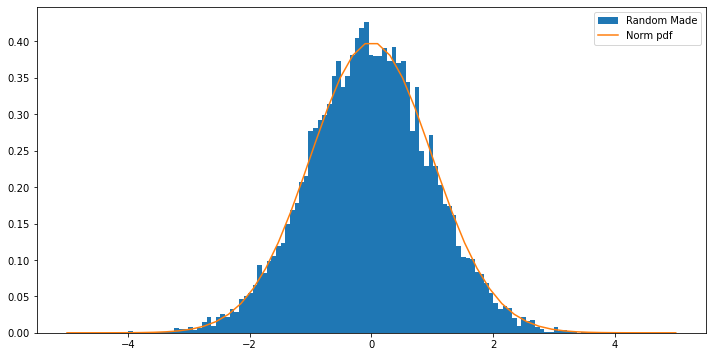

In [58]:
'''Uniform 분포 값 발생'''
random_num = [random.random() for x in range (10000)]

inv_normal_df_list = [inv_normal_df(u) for u in random_num]

histogram = np.histogram(inv_normal_df_list)
histogram_distribution = stats.rv_histogram(histogram)

x = np.linspace(-5, 5)
y = stats.norm.pdf(x)

plt.figure(figsize=(12,6))
plt.hist(inv_normal_df_list, density=True, bins=100, label='Random Made')
plt.plot(x, y, label='Norm pdf')
plt.legend()
plt.show()

## Exponential Random Variable

In [70]:
def inv_exponential_df(u, theta):
    return -np.log(1-u)/theta

def expon_pdf(u, theta):
    return theta * np.exp(-theta*u)

def expon_cdf(u, theta):
    return 1 - np.exp(-theta*u)

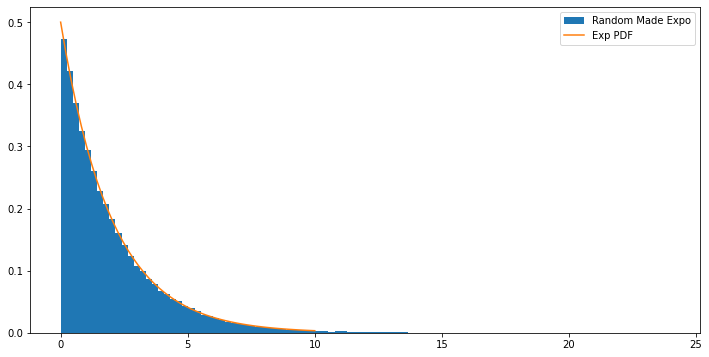

In [73]:
theta = 0.5

random_num = [random.random() for x in range (100000)]
inv_exp_list = [inv_exponential_df(x, theta) for x in random_num]

histogram = np.histogram(inv_exp_list)
histogram_distribution = stats.rv_histogram(histogram)

x = np.linspace(0, 10)
y = expon_pdf(x, theta)

plt.figure(figsize=(12,6))
plt.hist(inv_exp_list, bins=100, density=True, label='Random Made Expo')
plt.plot(x, y, label='Exp PDF')
plt.legend()
plt.show()

## Acceptance-Rejection Method

$$ f(x) \leq cg(x) $$

1. Generate $X$ from $g$
2. Generate $U$
3. Accept $X$ if $U \leq f(X)/cg(X)$

$$P(Y \in A) = \int_{A}^{} f(x)\, dx$$

In [28]:
def beta_func (u):
    if type(u) == list:

        def eq (u):
            return u**(3-1)*(1-u)**(2-1)

        value_list = []
        for i in u:
            beta = scipy.integrate.quad(lambda i: eq(i), 0, 1)[0]
            a = eq(i)
            value = 1/beta * a
            value_list.append(value)
        return value_list

    else:

        def eq (u):
            return u**(3-1)*(1-u)**(2-1)
            
        beta = scipy.integrate.quad(lambda u: eq(u), 0, 1)[0]
        a = eq(u)

        return 1/beta * a



In [31]:
c = beta_func(2/3)
c

1.7777777777777781

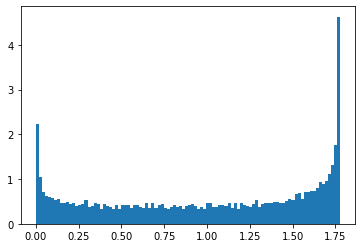

In [30]:
random_num = [random.random() for x in range (10000)]
beta_list = [beta_func(u) for u in random_num]

plt.hist(beta_list, density=True, bins=100, label='Random Made')
plt.show()

In [44]:
c = beta_func(2/3)
c

1.7777777777777781

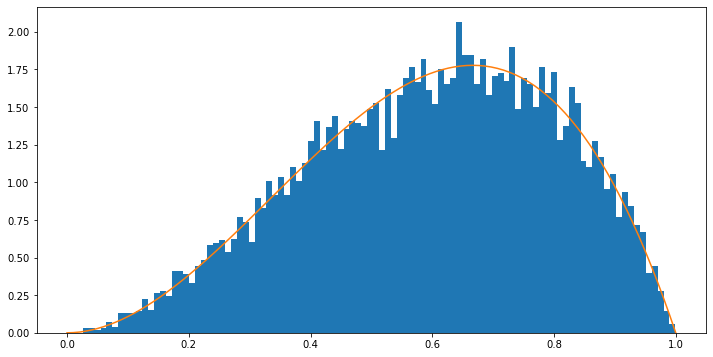

In [54]:
u1 = [random.random() for x in range(10000)]
u2 = [random.random() for x in range(10000)]



u2_list = []
while True:
    if len(u2_list) == 10000:
        break
    else:
        u1 = random.random()
        u2 = random.random()
        if c * u2 <= beta_func(u1):
            u2_list.append(u1)


plt.figure(figsize=(12,6))
plt.hist(u2_list, bins=100, density=True)
plt.plot(np.linspace(0,1,100), [beta_func(x) for x in np.linspace(0,1,100)])
plt.show()

## Box-Muller Method

In [64]:
def R (u):
    return -2 * np.log(u)

def V (u):
    return 2 * np.pi * u

def Z1 (r, v):
    return np.sqrt(r) * np.cos(v)

def Z2 (r, v):
    return np.sqrt(r) * np.sin(v)

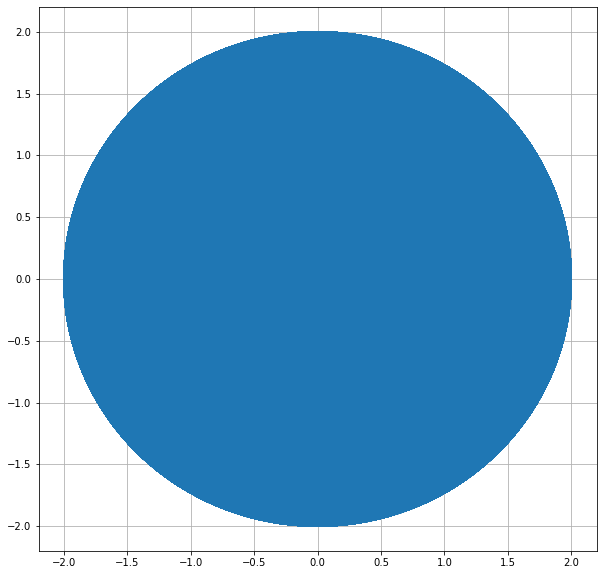

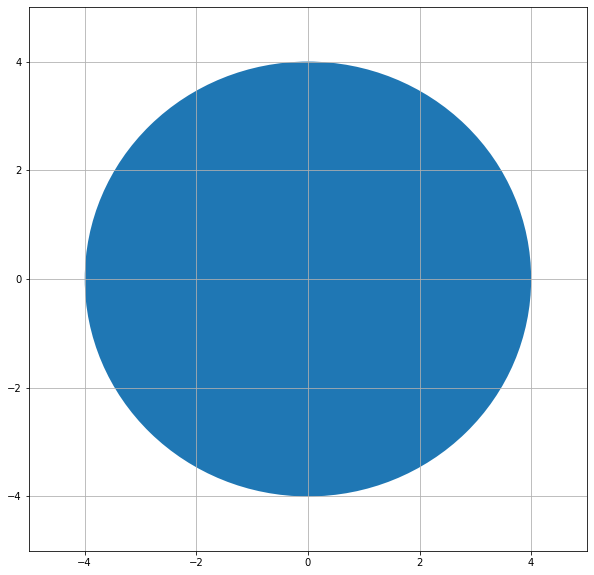

In [88]:
z1_list = []
z2_list = []

while True:

    if len(z1_list) != 100000:

        u1 = random.random()
        u2 = random.random()
        
        v = V(u2)
        r = R(u1)

        z1_list.append(Z1(4, v))
        z2_list.append(Z2(4, v))
    else:
        break


plt.rcParams['figure.figsize'] = (10,10)

plt.plot(z1_list, z2_list)
plt.grid()
fig, ax = plt.subplots()

ax.add_patch(
    patches.Circle((0,0), 4)
)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

plt.grid()